# Notebook to plot power spectra and CF for the halos and cdm

## Loading packages

In [1]:
import numpy as np
# import MAS_library as MASL
import plotting_library as PL
from pylab import *
from matplotlib.colors import LogNorm
import matplotlib as plt
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
text_size=26
fig_size_x=24
fig_size_y=14
from collections import defaultdict

import seaborn as sns
Colors = sns.color_palette("colorblind", 16).as_hex()
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import interpolate
from sympy import symbols, Eq, solve



## Nested dictionary

In [2]:
def nested_dict(n, type):
    if n == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))
    
data = nested_dict(5, list)
pow_gev = nested_dict(2, list)
class_data = nested_dict(3, list)
rsd_coeff = nested_dict(2, list)
bias_halo = nested_dict(2, list)
bias_halo_lin = nested_dict(2, list)
rsd_coeff_halo = nested_dict(2, list)
f_gr_data =nested_dict(2, list)

## Loading power and CF data

In [3]:
directory = "/Users/farbod/Dropbox/Projects/Doppler_RSD/Data/Powerpsectra_correlationfunction_particles_Pylians/"
directory_halo = "/Users/farbod/Dropbox/Projects/Doppler_RSD/Data/Power_spectra_correlation_function_RSD_noRSD_Halos/"
# directory_power = "/Users/farbod/Dropbox/Projects/Doppler_RSD//Data/kevolution_gevolution_power_output/"
directory_cross = "/Users/farbod/Dropbox/Projects/Doppler_RSD/Data/HaloxPcls_CrossPowerSpectra///"

files=["gevolution_boxsize_4032_ngrid_4608_lcdm_05062020",
       "gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_1_05062020",
       "gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em7_05062020",
       "kevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em4_05062020",
        "kevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em7_05062020"];

redshifts = ["0", "0.5", "1", "2", "3"];
files_list = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];


#############    
### Pylians #
#############
for j in range(5): # file
    for i in range(5): # redshift
        if (j==0):
            data['cdm']['RSD'][files_list[j]]['pow']['z='+str(redshifts[i])]=load(directory+"/RSD_pcls///pk3D_"+files[j]+"_z_"+str(redshifts[i])+".npy");
#             data['cdm']['RSD'][files_list[j]]['cor']['z='+str(redshifts[i])]=load(directory+"/RSD_pcls/CF_full_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        else:
            data['cdm']['RSD'][files_list[j]]['pow']['z='+str(redshifts[i])]=load(directory+"/RSD_wcdm_pcls//pk3D_"+files[j]+"_z_"+str(redshifts[i])+".npy");
#             data['cdm']['RSD'][files_list[j]]['cor']['z='+str(redshifts[i])]=load(directory+"/RSD_wcdm_pcls/CF_full_"+files[j]+"_z_"+str(redshifts[i])+".npy");

        data['cdm']['noRSD'][files_list[j]]['pow']['z='+str(redshifts[i])]=load(directory+"/no_RSD/pk3D_"+files[j]+"_z_"+str(redshifts[i])+".npy");
#         data['cdm']['noRSD'][files_list[j]]['cor']['z='+str(redshifts[i])]=load(directory+"/no_RSD/CF_full_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        data['halo']['noRSD'][files_list[j]]['pow']['z='+str(redshifts[i])]=load(directory_halo+"/no_RSD//pk3D_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        data['halo']['RSD'][files_list[j]]['pow']['z='+str(redshifts[i])]=load(directory_halo+"/RSD/pk3D_"+files[j]+"_z_"+str(redshifts[i])+".npy");
#         data['halo']['noRSD'][files_list[j]]['cor']['z='+str(redshifts[i])]=load(directory_halo+"/no_RSD//CF_full_"+files[j]+"_z_"+str(redshifts[i])+".npy");
#         data['halo']['RSD'][files_list[j]]['cor']['z='+str(redshifts[i])]=load(directory_halo+"/RSD/CF_full_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        data['cross']['noRSD'][files_list[j]]['pow']['z='+str(redshifts[i])]=load(directory_cross+"/noRSD/Cross_powerspectra_no_RSD///cross_pk3D_"+files[j]+"_z_"+str(redshifts[i])+".npy");

        if (j==0):
            data['cross']['RSD'][files_list[j]]['pow']['z='+str(redshifts[i])]=load(directory_cross+"/RSD/Cross_powerspectra_lcdm//cross_pk3D_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        else: 
            data['cross']['RSD'][files_list[j]]['pow']['z='+str(redshifts[i])]=load(directory_cross+"/RSD/Cross_powerspectra_wcdm//cross_pk3D_"+files[j]+"_z_"+str(redshifts[i])+".npy");
#############    
### CLASS ###
#############
directory_class = "/Users/farbod/Dropbox/Projects/Doppler_RSD/Data/CLASS_powers/"
files_list_class = ['lcdm','cs2_1','cs2_e4','cs2_e7'];
redshifts_class = [100, 50, 30, 10, 4, 3, 2.5, 2, 1.5, 1, 0.75, 0.5, 0.25, 0.1, 0];
# CLASS data loading:
for j in range(4):
    
    class_data['bg'][files_list_class[j]]=np.loadtxt(directory_class+files_list_class[j]+"/background.dat");
    for i in range(np.shape(redshifts_class)[0]): # redshift
        class_data['power_cb_lin'][files_list_class[j]]['z='+str(redshifts_class[i])]=np.loadtxt(directory_class+files_list_class[j]+"/z"+str(i+1)+"_pk_cb.dat");
        class_data['power_cb_nl'][files_list_class[j]]['z='+str(redshifts_class[i])]=np.loadtxt(directory_class+files_list_class[j]+"/z"+str(i+1)+"_pk_cb_nl.dat");
        class_data['tk'][files_list_class[j]]['z='+str(redshifts_class[i])]=np.loadtxt(directory_class+files_list_class[j]+"/z"+str(i+1)+"_tk.dat")

# CLASS conversion :
k_pivot = 0.05
A_s = 2.1e-9
n_s = 0.96
h = 0.67
k_class = class_data['tk'][files_list_class[0]]["z=0"][:,0]
conversion = A_s*(k_class*h/k_pivot)**(n_s-1)*(2.*np.pi**2/(k_class**3));

# RSD coefficient:
z_f = [0,0.5,1,2,3]
bias = 1;
for i in range(4): # file
     for j in range(5): # redshift
            if(i==0):
                z = class_data['bg'][files_list_class[i]][:,0];
                gr_f = class_data['bg'][files_list_class[i]][:,22];
                bg_file_interp = interpolate.interp1d(z,gr_f)
                f_gr = bg_file_interp(z_f[j]);
                rsd_coeff[files_list_class[i]]['z='+str(z_f[j])] = (bias**2 + 2.0 * bias * f_gr/3. + f_gr**2/5.)
                
            else:
                z = class_data['bg'][files_list_class[i]][:,0];
                gr_f = class_data['bg'][files_list_class[i]][:,24];
                bg_file_interp = interpolate.interp1d(z,gr_f)
                f_gr = bg_file_interp(z_f[j]);
                rsd_coeff[files_list_class[i]]['z='+str(z_f[j])] = (bias**2 + 2.0 * bias * f_gr/3. + f_gr**2/5.)

# Halo bias from P_hh/P_cdm    
file = ['gev_lcdm','gev_em0','kev_em4','gev_em7','kev_em7'];

for i in range(5): # file
     for j in range(5): # redshift
        P_hh = data['halo']['noRSD'][files_list[i]]['pow']['z='+str(redshifts[j])][1,:]
        P_cdm = data['cdm']['noRSD'][files_list[i]]['pow']['z='+str(redshifts[j])][1,:]
        
        bias_halo[file[i]]['z='+str(redshifts[j])] = np.sqrt(P_hh/P_cdm);
        bias_halo_lin[file[i]]['z='+str(redshifts[j])] = np.mean(bias_halo[file[i]]['z='+str(redshifts[j])][8:30])
        
for i in range(4): # file
     for j in range(5): # redshift
            if(i==0):
                z = class_data['bg'][files_list_class[i]][:,0];
                gr_f = class_data['bg'][files_list_class[i]][:,22];
                bg_file_interp = interpolate.interp1d(z,gr_f)
                f_gr = bg_file_interp(z_f[j]);
                f_gr_data[files_list_class[i]]['z='+str(z_f[j])] = f_gr
                bias_h =  bias_halo_lin[file[i]]['z='+str(redshifts[j])]
                rsd_coeff_halo[files_list_class[i]]['z='+str(z_f[j])] = (bias_h**2 + 2.0 * bias_h * f_gr/3. + f_gr**2/5.)
                
            else:
                z = class_data['bg'][files_list_class[i]][:,0];
                gr_f = class_data['bg'][files_list_class[i]][:,24];
                bg_file_interp = interpolate.interp1d(z,gr_f)
                bias_h =  bias_halo_lin[file[i]]['z='+str(redshifts[j])]
                f_gr = bg_file_interp(z_f[j]);
                rsd_coeff_halo[files_list_class[i]]['z='+str(z_f[j])] = (bias_h**2 + 2.0 * bias_h * f_gr/3. + f_gr**2/5.)
                f_gr_data[files_list_class[i]]['z='+str(z_f[j])] = f_gr
                
                
             

# Tests

In [5]:
data.keys()
class_data.keys()
class_data['Bg'].keys()
class_data['Bg']['lcdm'];
print(class_data['tk']['lcdm'].keys())
class_data['tk']['lcdm']['z=0'];

dict_keys(['z=100', 'z=50', 'z=30', 'z=10', 'z=4', 'z=3', 'z=2.5', 'z=2', 'z=1.5', 'z=1', 'z=0.75', 'z=0.5', 'z=0.25', 'z=0.1', 'z=0'])


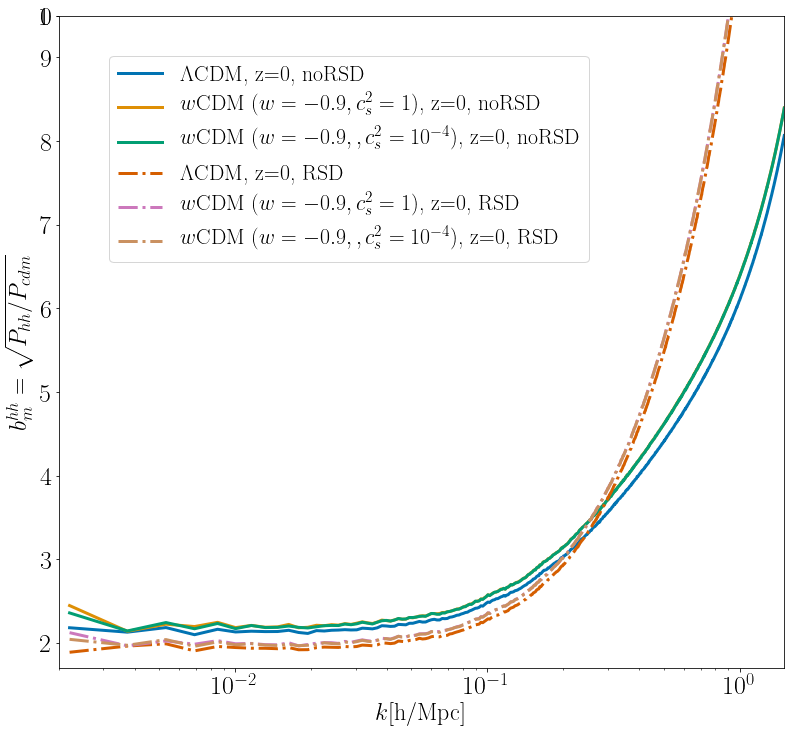

In [24]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)




file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0

kind1 = "cdm"
kind2 = "halo"
RSD ='noRSD'
l=0
for num1 in [0,1,3]: # file 1
    for j in [0]: # Redshifts
            [k1,pkref]=data["cdm"][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data["halo"][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,np.sqrt(pk2/pkref),"-",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j]+", "+RSD)
            l=l+1;
RSD ='RSD'
for num1 in [0,1,3]: # file 1
    for j in [0]: # Redshifts
            [k1,pkref]=data["cdm"][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data["halo"][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,np.sqrt(pk2/pkref),"-.",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j]+", "+RSD)
            l=l+1;

# axs[1].set_title(RSD, fontsize=22)
axs[1].set_ylabel('$b_m^{hh} = \sqrt{P_{hh}/P_{cdm}}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(1.7,9.5)
axs[1].set_xlim(2.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.4, 0.78], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


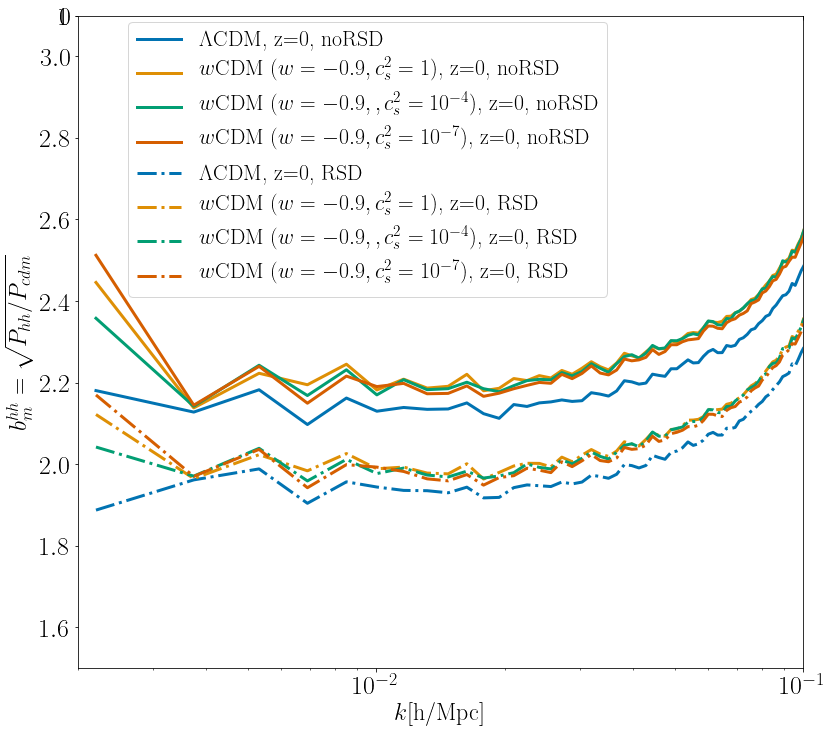

In [23]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)




file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0

kind1 = "cdm"
kind2 = "halo"
RSD ='noRSD'
l=0
for num1 in [0,1,3,4]: # file 1
    for j in [0]: # Redshifts
            [k1,pkref]=data["cdm"][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data["halo"][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,np.sqrt(pk2/pkref),"-",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j]+", "+RSD)
            l=l+1;
l=0
RSD ='RSD'
for num1 in [0,1,3,4]: # file 1
    for j in [0]: # Redshifts
            [k1,pkref]=data["cdm"][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data["halo"][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,np.sqrt(pk2/pkref),"-.",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j]+", "+RSD)
            l=l+1;

# axs[1].set_title(RSD, fontsize=22)
axs[1].set_ylabel('$b_m^{hh} = \sqrt{P_{hh}/P_{cdm}}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(1.5,3.1)
axs[1].set_xlim(2.e-3,0.1)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.4, 0.78], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Biases comparison

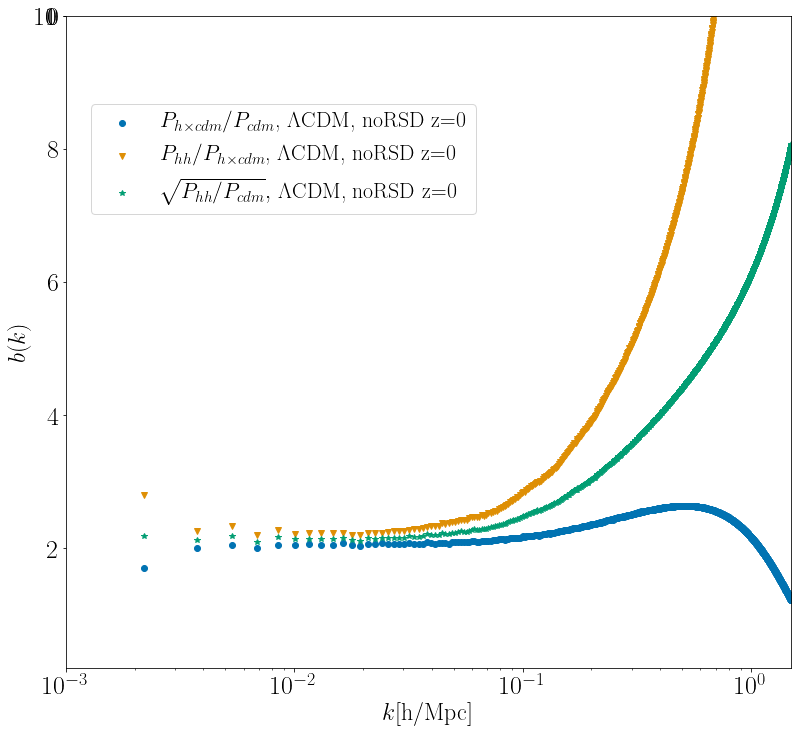

In [98]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0


l=0
for num1 in [0]: # file 1
    for j in [0]: # Redshifts
            kind1 = "cdm"
            kind2 = "cross"
            [k1,pkref]=data[kind1][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2][RSD][file[num1]]['pow'][z[j]][[0,7],:]
            axs[1].plot(k1,pk2/pkref,"o",color =Colors[l], lw=2,label=r"$P_{h \times cdm}/P_{cdm}$, "+ decrip[num1]+" "+RSD+" "+z[j])

            kind1 = "halo"
            kind2 = "cross"
            [k1,pk_h]=data["halo"][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data["cross"][RSD][file[num1]]['pow'][z[j]][[0,7],:]
            axs[1].plot(k1,pk_h/pk2,"v",color =Colors[l+1], lw=2,label=r"$P_{hh}/P_{h \times cdm}$, "+ decrip[num1]+" "+RSD+" "+z[j])
            
            kind1 = "cdm"
            kind2 = "halo"
            [k1,pkref]=data[kind1][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,np.sqrt(pk2/pkref),"*",color =Colors[l+2], lw=2,label=r"$\sqrt{P_{hh}/P_{cdm}},$ "+ decrip[num1]+" "+RSD+" "+z[j])
            l=l+1;
# l=0       
# RSD ='RSD'
# for num1 in [0]: # file 1
#     for j in [0]: # Redshifts
#             kind1 = "cdm"
#             kind2 = "cross"
#             [k1,pkref]=data[kind1][RSD][file[num1]]['pow'][z[j]][[0,1],:]
#             [k2,pk2]=data[kind2][RSD][file[num1]]['pow'][z[j]][[0,1],:]
#             axs[1].plot(k1,pk2/pkref,":",color =Colors[l], lw=2,label=r"$P_{h \times cdm}/P_{cdm}$, "+ decrip[num1]+" "+RSD+" "+z[j])

#             kind1 = "halo"
#             kind2 = "cross"
#             [k1,pk_h]=data["halo"][RSD][file[num1]]['pow'][z[j]][[0,1],:]
#             [k2,pk2]=data["cross"][RSD][file[num1]]['pow'][z[j]][[0,1],:]
#             axs[1].plot(k1,pk_h/pk2,":",color =Colors[l+1], lw=2,label=r"$P_{hh}/P_{h \times cdm}$, "+ decrip[num1]+" "+RSD+" "+z[j])
            
#             kind1 = "cdm"
#             kind2 = "halo"
#             [k1,pkref]=data[kind1][RSD][file[num1]]['pow'][z[j]][[0,1],:]
#             [k2,pk2]=data[kind2][RSD][file[num1]]['pow'][z[j]][[0,1],:]
#             axs[1].plot(k1,np.sqrt(pk2/pkref),":",color =Colors[l+2], lw=2,label=r"$\sqrt{P_{hh}/P_{cdm}},$ "+ decrip[num1]+" "+RSD+" "+z[j])
#             l=l+1;
# axs[1].set_title(RSD, fontsize=22)
axs[1].set_ylabel(r'$b (k)$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0.2,10)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.3, 0.78], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


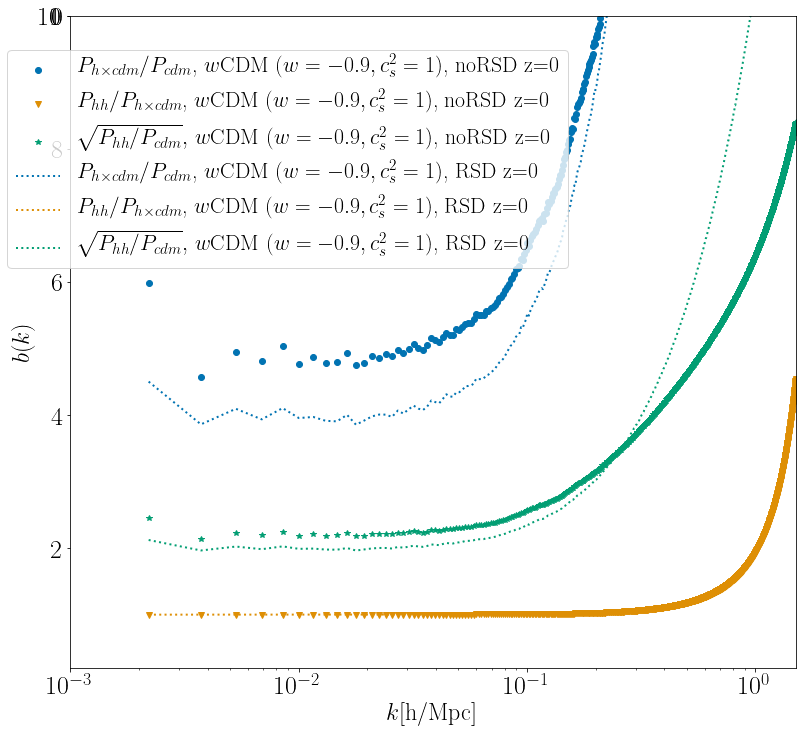

In [31]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0


l=0
for num1 in [1]: # file 1
    for j in [0]: # Redshifts
            kind1 = "cdm"
            kind2 = "cross"
            [k1,pkref]=data[kind1][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pkref,"o",color =Colors[l], lw=2,label=r"$P_{h \times cdm}/P_{cdm}$, "+ decrip[num1]+" "+RSD+" "+z[j])

            kind1 = "halo"
            kind2 = "cross"
            [k1,pk_h]=data["halo"][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data["cross"][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk_h/pk2,"v",color =Colors[l+1], lw=2,label=r"$P_{hh}/P_{h \times cdm}$, "+ decrip[num1]+" "+RSD+" "+z[j])
            
            kind1 = "cdm"
            kind2 = "halo"
            [k1,pkref]=data[kind1][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,np.sqrt(pk2/pkref),"*",color =Colors[l+2], lw=2,label=r"$\sqrt{P_{hh}/P_{cdm}},$ "+ decrip[num1]+" "+RSD+" "+z[j])
            l=l+1;
l=0       
RSD ='RSD'
for num1 in [1]: # file 1
    for j in [0]: # Redshifts
            kind1 = "cdm"
            kind2 = "cross"
            [k1,pkref]=data[kind1][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pkref,":",color =Colors[l], lw=2,label=r"$P_{h \times cdm}/P_{cdm}$, "+ decrip[num1]+" "+RSD+" "+z[j])

            kind1 = "halo"
            kind2 = "cross"
            [k1,pk_h]=data["halo"][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data["cross"][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk_h/pk2,":",color =Colors[l+1], lw=2,label=r"$P_{hh}/P_{h \times cdm}$, "+ decrip[num1]+" "+RSD+" "+z[j])
            
            kind1 = "cdm"
            kind2 = "halo"
            [k1,pkref]=data[kind1][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,np.sqrt(pk2/pkref),":",color =Colors[l+2], lw=2,label=r"$\sqrt{P_{hh}/P_{cdm}},$ "+ decrip[num1]+" "+RSD+" "+z[j])
            l=l+1;
# axs[1].set_title(RSD, fontsize=22)
axs[1].set_ylabel(r'$b (k)$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0.2,10)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.3, 0.78], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


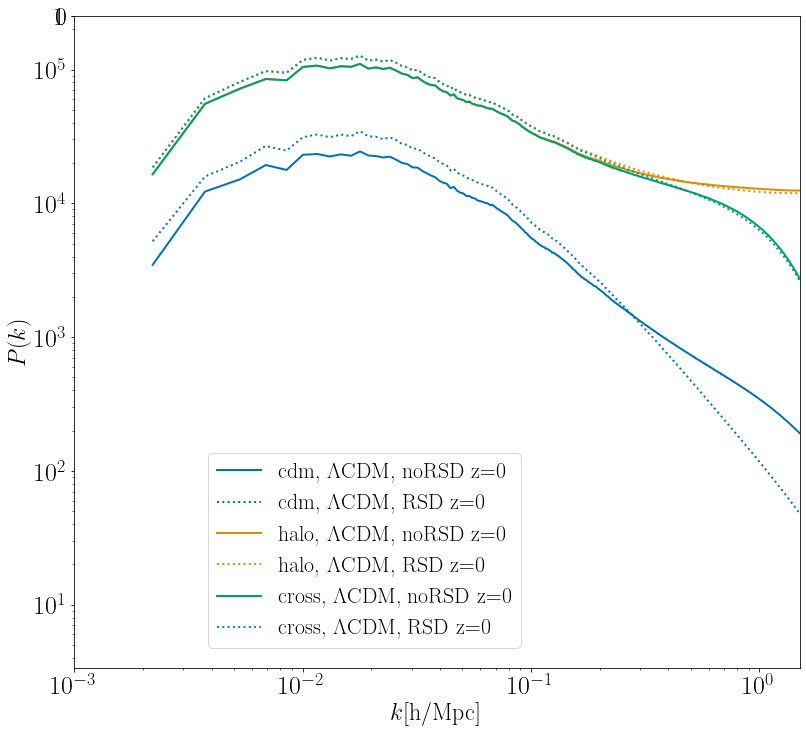

In [43]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)

l=0       

for num1 in [0]: # file 1
    for j in [0]: # Redshifts
        for kind in ["cdm","halo","cross"]:
            RSD ='noRSD'
            [k2,pk]=data[kind][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk,"-",color =Colors[l], lw=2,label=kind+", "+  decrip[num1]+" "+RSD+" "+z[j])
            RSD ='RSD'
            [k2,pk]=data[kind][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk,":",color =Colors[l], lw=2,label=kind+", "+ decrip[num1]+" "+RSD+" "+z[j])
            l=l+1
axs[1].set_ylabel(r'$P (k)$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
plt.yscale('log')
# axs[1].set_ylim(0.2,10)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.4, 0.18], loc='center')
X=np.arange(0.001,20,1)


# Model comparison

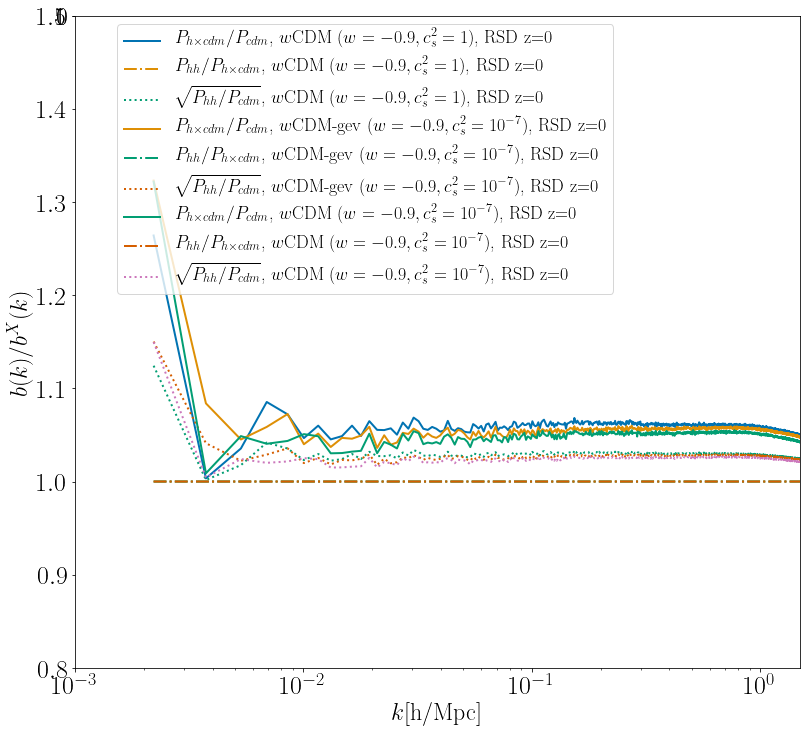

In [81]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0


# l=0
# for num1 in [1]: # file 1
#     for j in [0]: # Redshifts
#             kind1 = "cdm"
#             kind2 = "cross"
#             [k1,pkref]=data[kind1][RSD][file[num1]]['pow'][z[j]][[0,1],:]
#             [k2,pk2]=data[kind2][RSD][file[num1]]['pow'][z[j]][[0,1],:]
#             axs[1].plot(k1,pk2/pkref,"o",color =Colors[l], lw=2,label=r"$P_{h \times cdm}/P_{cdm}$, "+ decrip[num1]+" "+RSD+" "+z[j])

#             kind1 = "halo"
#             kind2 = "cross"
#             [k1,pk_h]=data["halo"][RSD][file[num1]]['pow'][z[j]][[0,1],:]
#             [k2,pk2]=data["cross"][RSD][file[num1]]['pow'][z[j]][[0,1],:]
#             axs[1].plot(k1,pk_h/pk2,"v",color =Colors[l+1], lw=2,label=r"$P_{hh}/P_{h \times cdm}$, "+ decrip[num1]+" "+RSD+" "+z[j])
            
#             kind1 = "cdm"
#             kind2 = "halo"
#             [k1,pkref]=data[kind1][RSD][file[num1]]['pow'][z[j]][[0,1],:]
#             [k2,pk2]=data[kind2][RSD][file[num1]]['pow'][z[j]][[0,1],:]
#             axs[1].plot(k1,np.sqrt(pk2/pkref),"*",color =Colors[l+2], lw=2,label=r"$\sqrt{P_{hh}/P_{cdm}},$ "+ decrip[num1]+" "+RSD+" "+z[j])
#             l=l+1;
l=0       
RSD ='RSD'
for num1 in [1,2,4]: # file 1
    for ref in [0]: # file 1
        for j in [0]: # Redshifts
            kind1 = "cdm"
            kind2 = "cross"
            [k1,pkref]=data[kind1][RSD][file[ref]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2][RSD][file[ref]]['pow'][z[j]][[0,1],:]
            bias_ref = pk2/pkref;
            [k1,pkref]=data[kind1][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            bias_2 = pk2/pkref;
            axs[1].plot(k1,bias_2/bias_ref,"-",color =Colors[l], lw=2,label=r"$P_{h \times cdm}/P_{cdm}$, "+decrip[num1]+" "+RSD+" "+z[j])

            kind1 = "halo"
            kind2 = "cross"
            [k1,pkh_ref]=data[kind1][RSD][file[ref]]['pow'][z[j]][[0,1],:]
            [k2,pk2_ref]=data[kind2][RSD][file[ref]]['pow'][z[j]][[0,1],:]
            bias_ref = pkh_ref/pk2_ref;
            [k1,pkh]=data[kind1][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            bias_2 = pkh/pk2;
            axs[1].plot(k1,bias_2/bias_ref,"-.",color =Colors[l+1], lw=2,label=r"$P_{hh}/P_{h \times cdm}$, "+ decrip[num1]+" "+RSD+" "+z[j])
        
            kind1 = "cdm"
            kind2 = "halo"
            
            [k1,pk1]=data[kind1][RSD][file[ref]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2][RSD][file[ref]]['pow'][z[j]][[0,1],:]
            bias_ref = np.sqrt(pk2/pk1);
            [k1,pk1]=data[kind1][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            bias_2 =  np.sqrt(pk2/pk1);
            axs[1].plot(k1,bias_2/bias_ref,":",color =Colors[l+2], lw=2,label=r"$\sqrt{P_{hh}/P_{cdm}}$, "+decrip[num1]+" "+RSD+" "+z[j])

            l=l+1;
# axs[1].set_title(RSD, fontsize=22)
axs[1].set_ylabel(r'$b (k)/b^{X}(k)$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0.8,1.5)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=18,bbox_to_anchor=[0.4, 0.78], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


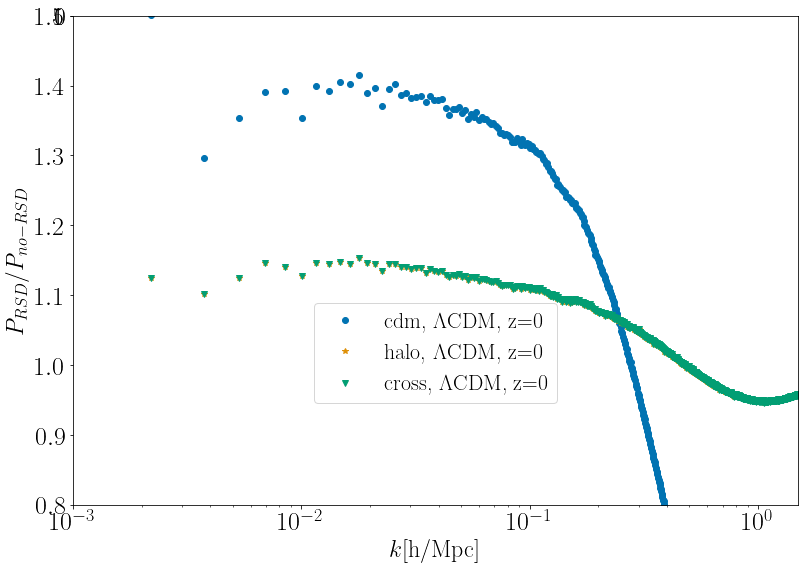

In [97]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,9),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0

kind = "cdm"
l=0
for num1 in [0]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;
kind = 'halo'
for num1 in [0]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"*",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;
kind = 'cross'
for num1 in [0]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"v",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;

axs[1].set_ylabel('$P_{RSD}/P_{no-RSD}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0.8,1.5)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.31], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo bias

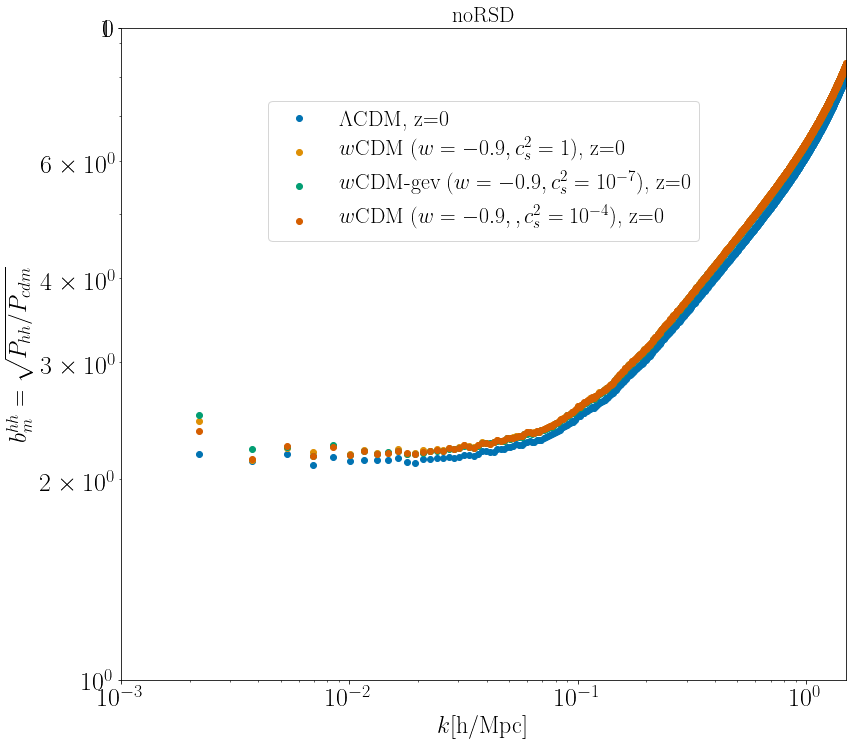

In [68]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)




file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0

kind1 = "cdm"
kind2 = "halo"
RSD ='noRSD'
l=0
for num1 in [0,1,2,3]: # file 1
    for j in [0]: # Redshifts
            [k1,pkref]=data[kind1][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,np.sqrt(pk2/pkref),"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
            l=l+1;
axs[1].set_title(RSD, fontsize=22)
axs[1].set_ylabel('$b_m^{hh} = \sqrt{P_{hh}/P_{cdm}}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
plt.yscale('log')
axs[1].set_ylim(1,9.5)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.78], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo bias from cross power

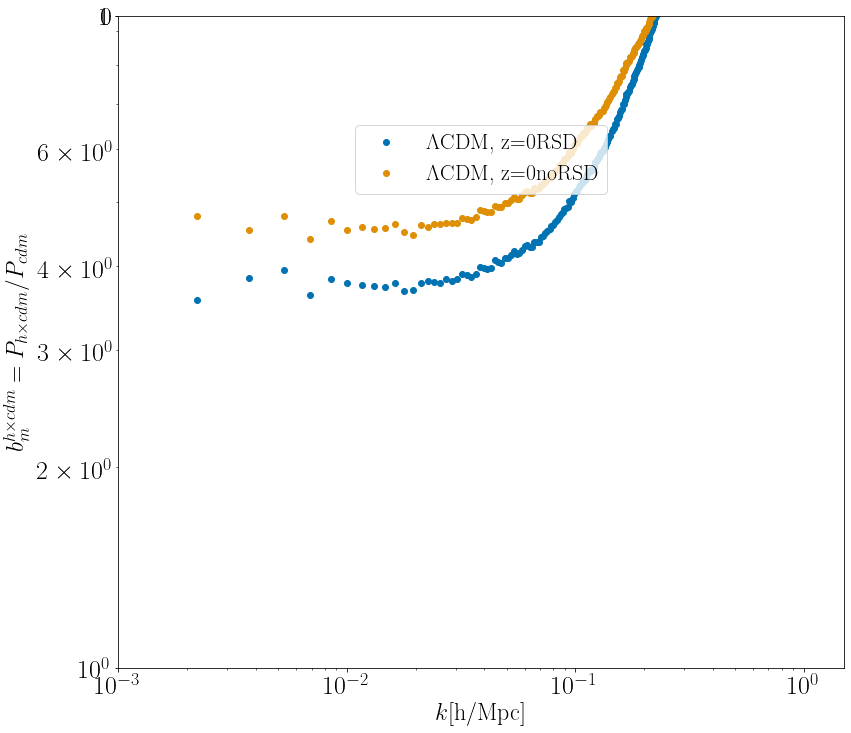

In [8]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'

file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0

kind1 = "cdm"
kind2 = "cross"
RSD ='RSD'
l=0
for num1 in [0]: # file 1
    for j in [0]: # Redshifts
            [k1,pkref]=data[kind1][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pkref,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j]+RSD)
            l=l+1;
            
kind1 = "cdm"
kind2 = "cross"
RSD ='noRSD'
# l=0
for num1 in [0]: # file 1
    for j in [0]: # Redshifts
            [k1,pkref]=data[kind1][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pkref,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j]+RSD)
            l=l+1;
# axs[1].set_title(RSD, fontsize=22)
axs[1].set_ylabel(r'$b_m^{h \times cdm} = P_{h \times cdm}/P_{cdm}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
plt.yscale('log')
axs[1].set_ylim(2,100)
axs[1].set_xlim(1.e-3,1.5)
axs[1].set_ylim(1,9.5)

# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.78], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


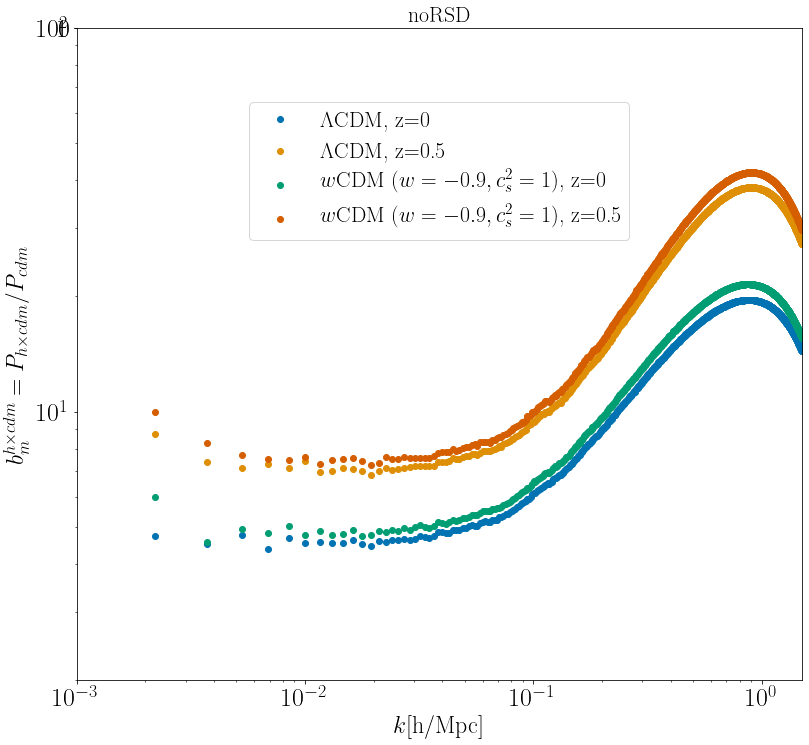

In [7]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0

kind1 = "cdm"
kind2 = "cross"
l=0
for num1 in [0,1]: # file 1
    for j in [0,1]: # Redshifts
            [k1,pkref]=data[kind1][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pkref,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
            l=l+1;
axs[1].set_title(RSD, fontsize=22)
axs[1].set_ylabel(r'$b_m^{h \times cdm} = P_{h \times cdm}/P_{cdm}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
plt.yscale('log')
axs[1].set_ylim(2,100)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.78], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


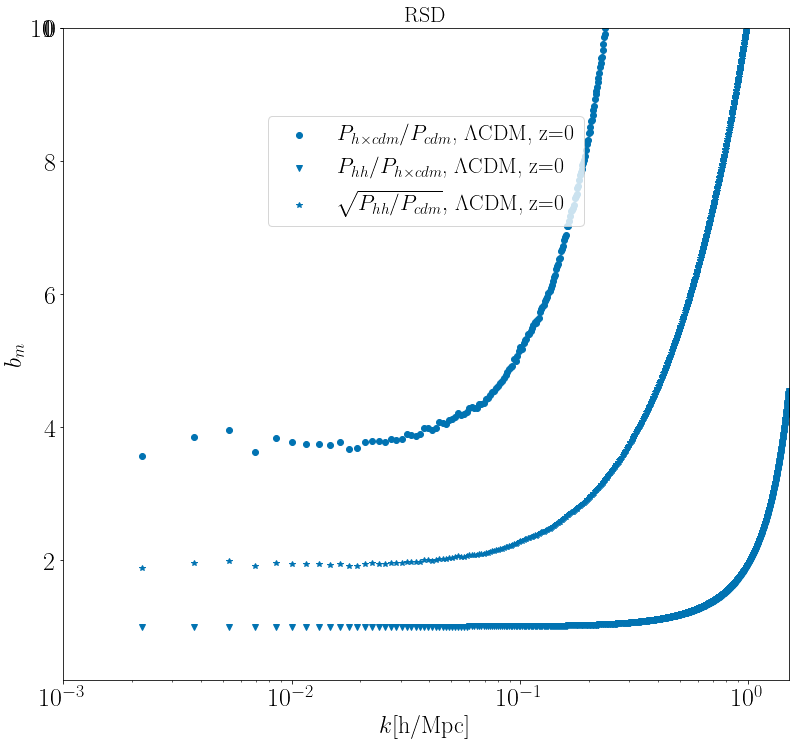

In [11]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0


l=0
for num1 in [0]: # file 1
    for j in [0]: # Redshifts
            kind1 = "cdm"
            kind2 = "cross"
            [k1,pkref]=data[kind1][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pkref,"o",color =Colors[l], lw=2,label=r"$P_{h \times cdm}/P_{cdm}$, "+ decrip[num1]+" "+z[j])

            kind1 = "halo"
            kind2 = "cross"
            [k1,pk_h]=data["halo"][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data["cross"][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk_h/pk2,"v",color =Colors[l], lw=2,label=r"$P_{hh}/P_{h \times cdm}$, "+ decrip[num1]+" "+z[j])
            
            kind1 = "cdm"
            kind2 = "halo"
            [k1,pkref]=data[kind1][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,np.sqrt(pk2/pkref),"*",color =Colors[l], lw=2,label=r"$\sqrt{P_{hh}/P_{cdm}},$ "+ decrip[num1]+" "+z[j])
            l=l+1;
axs[1].set_title(RSD, fontsize=22)
axs[1].set_ylabel(r'$b_m$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0.2,10)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.78], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


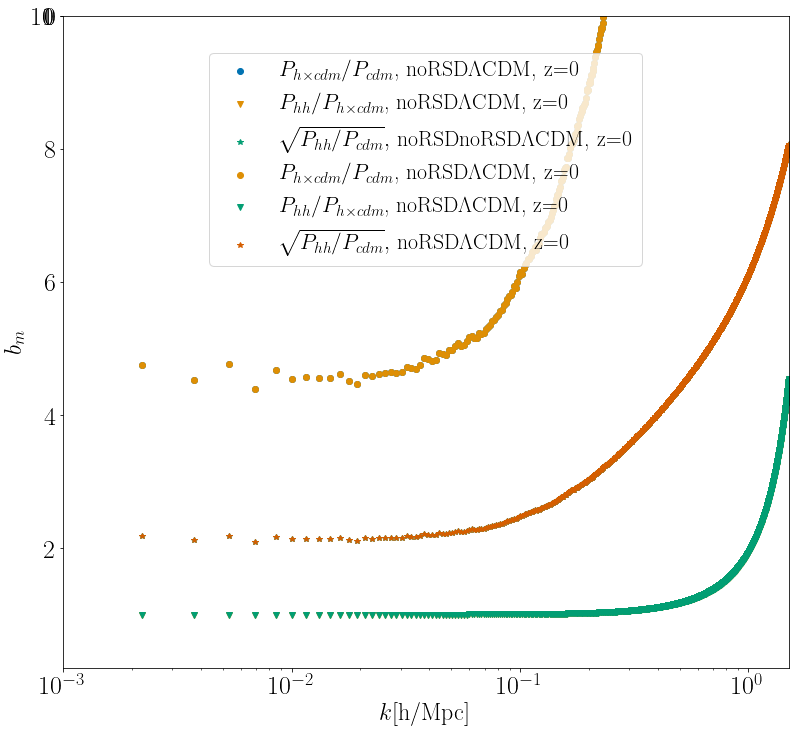

In [12]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0


l=0
for num1 in [0]: # file 1
    for j in [0]: # Redshifts
            kind1 = "cdm"
            kind2 = "cross"
            [k1,pkref]=data[kind1][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pkref,"o",color =Colors[l], lw=2,label=r"$P_{h \times cdm}/P_{cdm}$, "+ RSD + decrip[num1]+" "+z[j])

            kind1 = "halo"
            kind2 = "cross"
            [k1,pk_h]=data["halo"][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data["cross"][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk_h/pk2,"v",color =Colors[l+1], lw=2,label=r"$P_{hh}/P_{h \times cdm}$, "+ RSD + decrip[num1]+" "+z[j])
            
            kind1 = "cdm"
            kind2 = "halo"
            [k1,pkref]=data[kind1][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,np.sqrt(pk2/pkref),"*",color =Colors[l+2], lw=2,label=r"$\sqrt{P_{hh}/P_{cdm}},$ "+ RSD + RSD + decrip[num1]+" "+z[j])
            l=l+1;
RSD ='noRSD'            
for num1 in [0]: # file 1
    for j in [0]: # Redshifts
            kind1 = "cdm"
            kind2 = "cross"
            [k1,pkref]=data[kind1][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pkref,"o",color =Colors[l], lw=2,label=r"$P_{h \times cdm}/P_{cdm}$, "+ RSD + decrip[num1]+" "+z[j])

            kind1 = "halo"
            kind2 = "cross"
            [k1,pk_h]=data["halo"][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data["cross"][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk_h/pk2,"v",color =Colors[l+1], lw=2,label=r"$P_{hh}/P_{h \times cdm}$, "+ RSD + decrip[num1]+" "+z[j])
            
            kind1 = "cdm"
            kind2 = "halo"
            [k1,pkref]=data[kind1][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2][RSD][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,np.sqrt(pk2/pkref),"*",color =Colors[l+2], lw=2,label=r"$\sqrt{P_{hh}/P_{cdm}},$ "+ RSD + decrip[num1]+" "+z[j])
            l=l+1;

# axs[1].set_title(RSD, fontsize=22)
axs[1].set_ylabel(r'$b_m$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0.2,10)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.78], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo power RSD and no-RSD

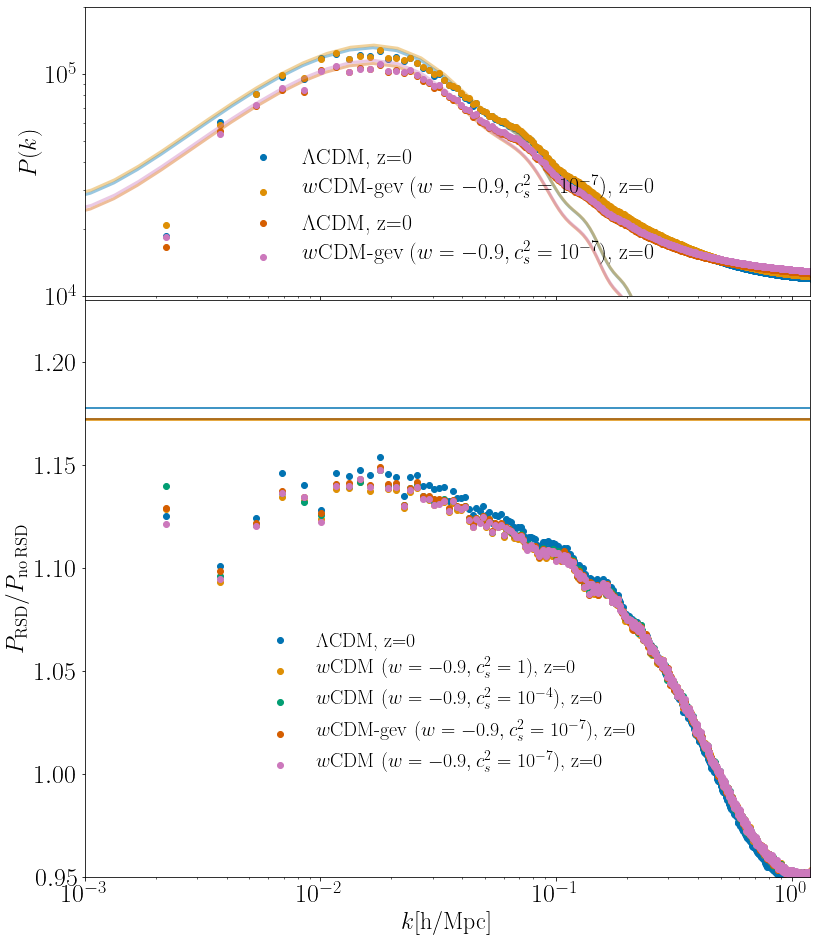

In [194]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'halo'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ",
          "$w$CDM ($w=-0.9, c_s^2=10^{-4}$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,3]: # file
    for j in [0]: # Redshifts
        redshift ="z="+str(j);
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][redshift][[0,1],:]  
        axs[0].loglog(k_w,pk,"o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        
        bias_h = bias_halo_lin[file[i]]['z='+str(redshifts[j])]
        k_class = class_data['tk'][files_list_class[i]][redshift][:,0]
        pk_class = class_data['tk'][files_list_class[i]][redshift][:,3]
        axs[0].loglog(k_class, pk_class**2 *conversion  * np.double(rsd_coeff_halo[files_list_class[i]]['z='+str(z_f[j])]) ,"-",alpha=0.4,color =Colors[l], lw=3)

        l=l+1
l=3
RSD ='noRSD'
for i in [0,3]: # file
    for j in [0]: # Redshifts
        redshift ="z="+str(j);
        [k_w,pk]=data[kind][RSD][file[i]]['pow'][redshift][[0,1],:]  
        axs[0].loglog(k_w,pk,"o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        
        bias_h = bias_halo_lin[file[i]]['z='+str(redshifts[j])]
        k_class = class_data['tk'][files_list_class[i]][redshift][:,0]
        pk_class = class_data['tk'][files_list_class[i]][redshift][:,3]
        axs[0].loglog(k_class, pk_class**2 *conversion  * bias_h**2,"-",alpha=0.4,color =Colors[l], lw=3)

        l=l+1
        
        
# axs[0].set_title(RSD, fontsize=22)

axs[0].set_ylabel('$P(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(1.e4,2.e5)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.5, 0.3], loc='center',frameon=False)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow']['z='+str(z_f[j])][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow']['z='+str(z_f[j])][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
            l=l+1;
l=0
for num1 in [0,1,2,3]: # file 1
    for j in [0]: # Redshifts
            bias_h = bias_halo_lin[file[num1]]['z='+str(redshifts[j])]
            axs[1].axhline(y=(np.double(rsd_coeff_halo[files_list_class[num1]]['z='+str(z_f[j])])/(bias_h)**2) , color=Colors[l], linestyle='-')
            l=l+1;


axs[1].set_ylabel(r'$P_{\rm RSD}/P_{\rm no \, RSD}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0.95,1.23)
axs[1].set_xlim(1.e-3,1.2)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=20,bbox_to_anchor=[0.5, 0.3], loc='center',frameon=False)
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)
plt.savefig('RSD_to_noRSD_halo.pdf', format='pdf',dpi=300, bbox_inches='tight' )


# Halo power spectra moment

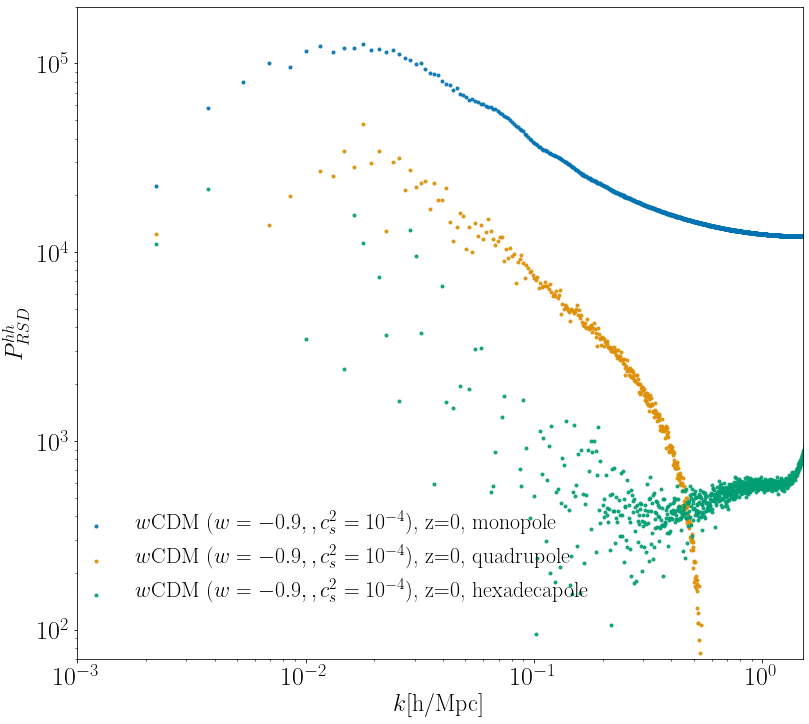

In [253]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12))
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0

kind = "halo"
l=0
for num1 in [1]: # file 1
    for j in [0]: # Redshifts
        [k0,pk0]=data[kind]['RSD'][file[num1]]['pow']['z='+str(z_f[j])][[0,1],:]
        [k2,pk2]=data[kind]['RSD'][file[num1]]['pow']['z='+str(z_f[j])][[0,2],:]
        [k4,pk4]=data[kind]['RSD'][file[num1]]['pow']['z='+str(z_f[j])][[0,3],:]
        axs.loglog(k0, pk0,".",alpha=0.9,color =Colors[l], lw=3,label=decrip[i]+z[j]+", monopole")
        axs.loglog(k0, pk2,".",alpha=0.9,color =Colors[l+1], lw=3,label=decrip[i]+z[j]+", quadrupole")
        axs.loglog(k0, pk4,".",alpha=0.9,color =Colors[l+2], lw=3,label=decrip[i]+z[j]+", hexadecapole")

        l=l+1
#         c1 =  # P^0 = (b^2 + (2 b f)/3 + f^2/5)
#         # P^2 = (4 b f)/3 + (4 f^2)/7
        # P^4 = (8 f^2)/35

axs.set_ylabel(r'$P^{hh}_{RSD}$',fontsize=24)
axs.set_xlabel('$k$[h/Mpc]',fontsize=24)
axs.set_xscale('log')
# plt.yscale('log')
axs.set_ylim(7.e1,2.e5)
axs.set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs.legend(fontsize=22,bbox_to_anchor=[0.35, 0.15], loc='center',frameon=False)
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


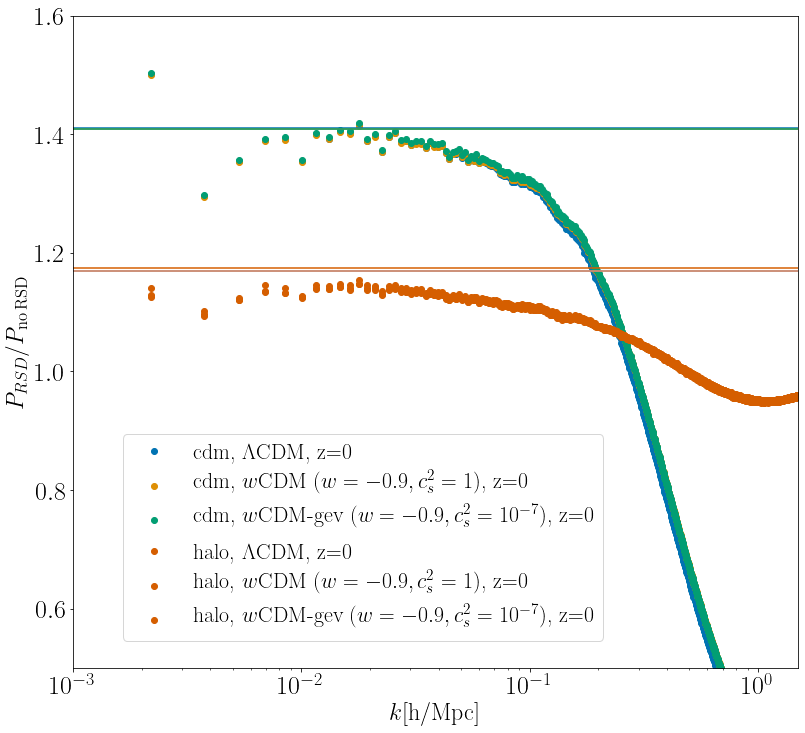

In [228]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12))
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0

kind = "cdm"
l=0
for num1 in [0,1,2]: # file 1
    for j in [0]: # Redshifts
        [k0,pk0]=data[kind]['RSD'][file[num1]]['pow']['z='+str(z_f[j])][[0,1],:]
        [k0,pk2]=data[kind]['RSD'][file[num1]]['pow']['z='+str(z_f[j])][[0,2],:]
        [k0,pk4]=data[kind]['RSD'][file[num1]]['pow']['z='+str(z_f[j])][[0,3],:]

        c1 = pk0/pk4  # P^0 = (b^2 + (2 b f)/3 + f^2/5)
        c2 = pk2/pk4 # P^2 = (4 b f)/3 + (4 f^2)/7
        # P^4 = (8 f^2)/35

axs.set_ylabel(r'$P_{RSD}/P_{\rm no \, RSD}$',fontsize=24)
axs.set_xlabel('$k$[h/Mpc]',fontsize=24)
axs.set_xscale('log')
# plt.yscale('log')
axs.set_ylim(0.5,1.6)
axs.set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs.legend(fontsize=22,bbox_to_anchor=[0.4, 0.2], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Linear Halo bias from the moments

In [ ]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12))
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0

kind = "cdm"
l=0
for num1 in [0,1,2]: # file 1
    for j in [0]: # Redshifts
        [k0,pk0]=data[kind]['RSD'][file[num1]]['pow']['z='+str(z_f[j])][[0,1],:]
        [k0,pk2]=data[kind]['RSD'][file[num1]]['pow']['z='+str(z_f[j])][[0,2],:]
        [k0,pk4]=data[kind]['RSD'][file[num1]]['pow']['z='+str(z_f[j])][[0,3],:]

#         c1 = pk0/pk4  # P^0 = (b^2 + (2 b f)/3 + f^2/5)
#         c2 = pk2/pk4 # P^2 = (4 b f)/3 + (4 f^2)/7
        
#         c1 = np.mean(c1[8:30])
#         c1 = np.mean(c2[8:30])
#         y = symbols('f')
#         eq1 = Eq(35./(6.*f) 5./2.)
#         sol = solve(eq1)
        
        # P^4 = (8 f^2)/35

axs.set_ylabel(r'$P_{RSD}/P_{\rm no \, RSD}$',fontsize=24)
axs.set_xlabel('$k$[h/Mpc]',fontsize=24)
axs.set_xscale('log')
# plt.yscale('log')
axs.set_ylim(0.5,1.6)
axs.set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs.legend(fontsize=22,bbox_to_anchor=[0.4, 0.2], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


In [288]:
num1=0
[k0,pk0]=data[kind]['RSD'][file[num1]]['pow']['z='+str(z_f[j])][[0,1],:]
[k0,pk2]=data[kind]['RSD'][file[num1]]['pow']['z='+str(z_f[j])][[0,2],:]
[k0,pk4]=data[kind]['RSD'][file[num1]]['pow']['z='+str(z_f[j])][[0,3],:]

c1 = pk0/pk4  # P^0 = (b^2 + (2 b f)/3 + f^2/5)
c2 = pk2/pk4 # P^2 = (4 b f)/3 + (4 f^2)/7

c1 = np.mean(c1[5:30])
c2 = np.mean(c2[5:30])
# c2
print(c1,c2)

4.180579813979008 0.4249962671954345


In [282]:
bias_h = bias_halo_lin[file[0]]['z=0']
f = f_gr_data[files_list_class[0]]['z=0']
(bias_h,f)

(2.169218274529993, array(0.53073438))

# Halo vs cdm, RSD and noRSD redshift evolution

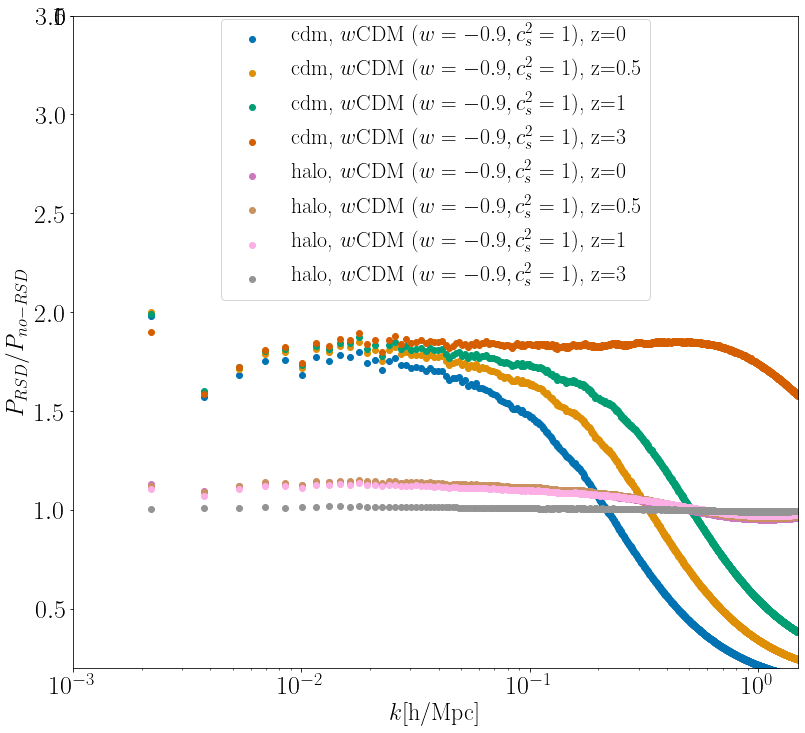

In [261]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0

kind = "cdm"
l=0
for num1 in [1]: # file 1
    for j in [0,1,2,4]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;
kind = 'halo'
for num1 in [1]: # file 1
    for j in [0,1,2,4]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;

axs[1].set_ylabel('$P_{RSD}/P_{no-RSD}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0.2,3.5)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.78], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


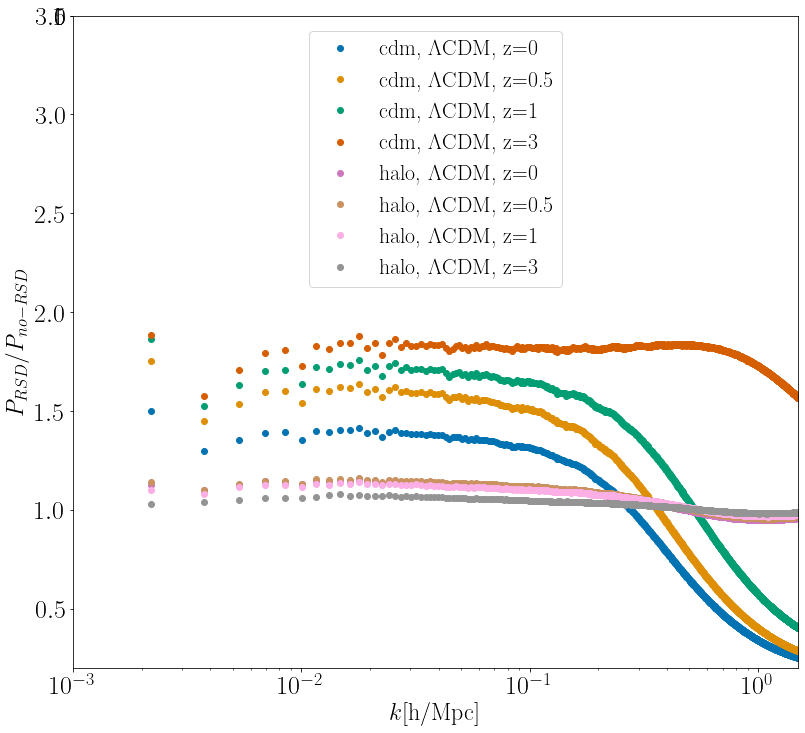

In [103]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0

kind = "cdm"
l=0
for num1 in [0]: # file 1
    for j in [0,1,2,4]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;
kind = 'halo'
for num1 in [0]: # file 1
    for j in [0,1,2,4]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;

axs[1].set_ylabel('$P_{RSD}/P_{no-RSD}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0.2,3.5)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.78], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo over cdm power spectrum

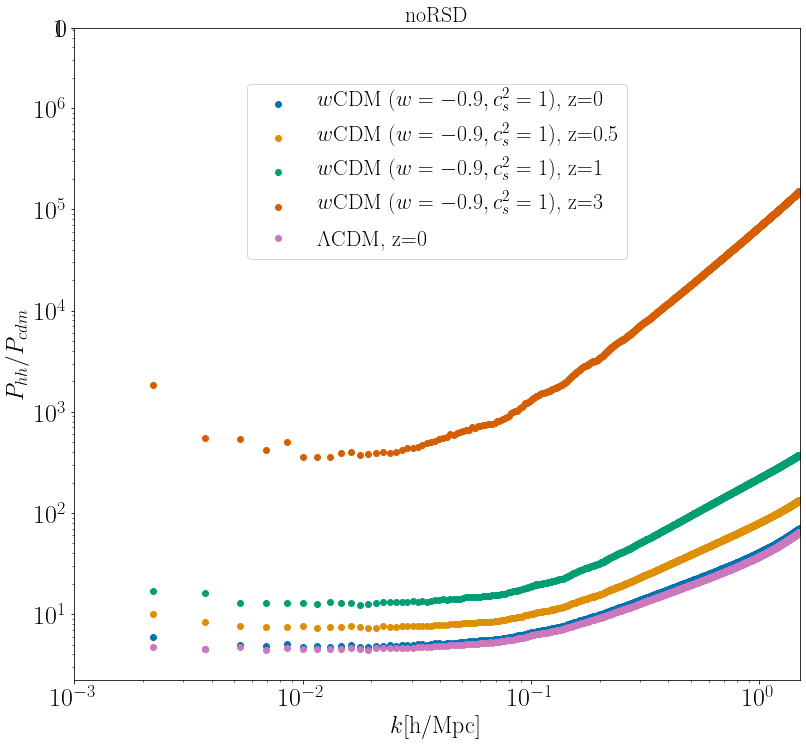

In [271]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0

kind1 = "cdm"
kind2 = "halo"
l=0
for num1 in [1]: # file 1
    for j in [0,1,2,4]: # Redshifts
            [k1,pk1]=data[kind1]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
            l=l+1;
for num1 in [0]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind1]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
            l=l+1;
axs[1].set_title(RSD, fontsize=22)
axs[1].set_ylabel('$P_{hh}/P_{cdm}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
plt.yscale('log')
# axs[1].set_ylim(0.2,3.5)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.78], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


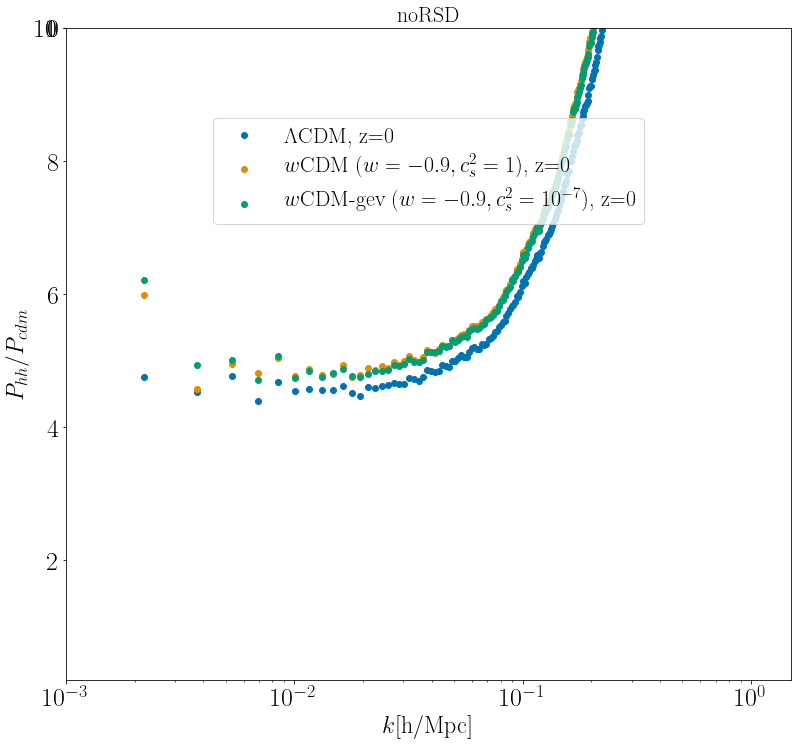

In [287]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
RSD ='noRSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0

kind1 = "cdm"
kind2 = "halo"
l=0
for num1 in [0,1,2]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind1]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            [k2,pk2]=data[kind2]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
            l=l+1;
# for num1 in [0,1]: # file 1
#     for j in [0]: # Redshifts
#             [k1,pk1]=data[kind1]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
#             [k2,pk2]=data[kind2]['noRSD'][file[num1]]['pow'][z[j]][[0,1],:]
#             axs[1].plot(k1,pk2/pk1,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
#             l=l+1;
axs[1].set_title(RSD, fontsize=22)
axs[1].set_ylabel('$P_{hh}/P_{cdm}$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0.2,10)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.78], loc='center')
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Correlation function cdm, no RSD

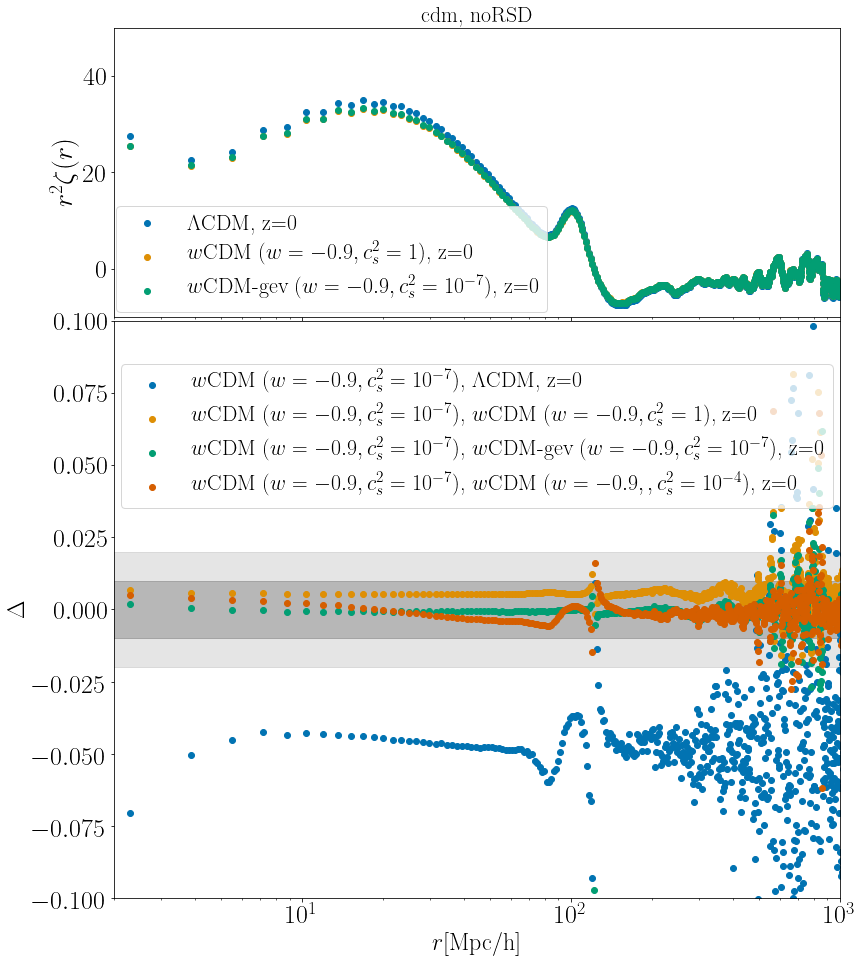

In [306]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cdm'
RSD ='noRSD'
file_type = 'cor'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [r,zeta]=data[kind][RSD][file[i]][file_type][z[j]][[0,1],:]  
        axs[0].plot(r,zeta*r**2,"o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$r^2 \zeta(r)$',fontsize=28)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_xscale('log')
axs[0].set_ylim(-10,50)
# axs[0].set_xlim(1.e-2,500)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.3, 0.2], loc='center')
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [r1,zeta1]=data[kind][RSD][file[num1]][file_type][z[j]][[0,1],:]
                [r2,zsta2]=data[kind][RSD][file[num2]][file_type][z[j]][[0,1],:]
                axs[1].plot(k1,(zsta2-zeta1)/zeta1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$r$[Mpc/h]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.1,0.1)
axs[1].set_xlim(2,1000)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.8], loc='center')
X=np.arange(0.001,2000,20)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Correlation function cdm, RSD

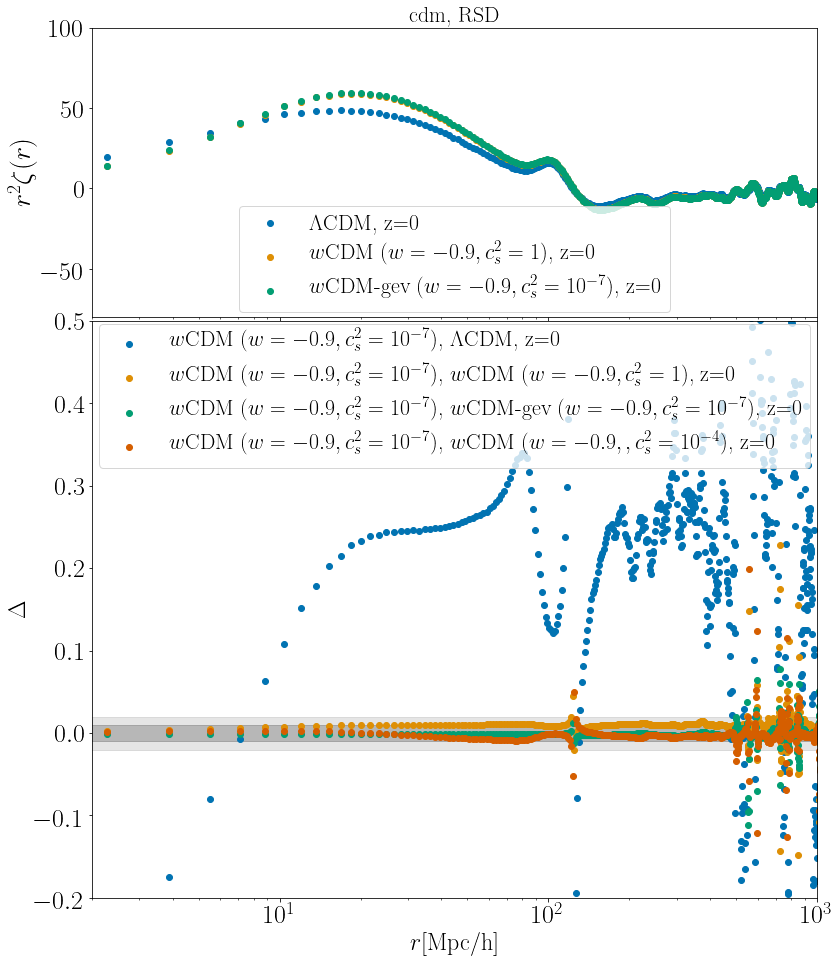

In [310]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cdm'
RSD ='RSD'
file_type = 'cor'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [r,zeta]=data[kind][RSD][file[i]][file_type][z[j]][[0,1],:]  
        axs[0].plot(r,zeta*r**2,"o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$r^2 \zeta(r)$',fontsize=28)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_xscale('log')
axs[0].set_ylim(-8.e1,1.e2)
# axs[0].set_xlim(1.e-2,500)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.5, 0.2], loc='center')
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [r1,zeta1]=data[kind][RSD][file[num1]][file_type][z[j]][[0,1],:]
                [r2,zsta2]=data[kind][RSD][file[num2]][file_type][z[j]][[0,1],:]
                axs[1].plot(k1,(zsta2-zeta1)/zeta1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$r$[Mpc/h]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.2,0.5)
axs[1].set_xlim(2,1000)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.87], loc='center')
X=np.arange(0.001,2000,20)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo  Correlation function, noRSD

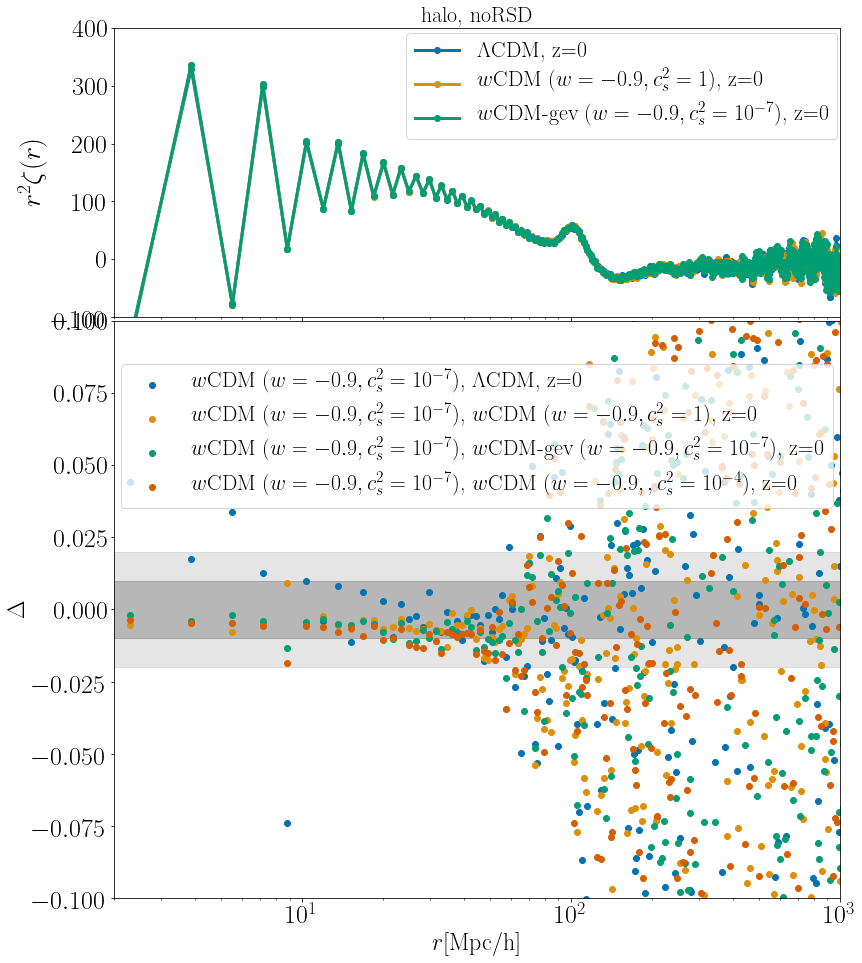

In [320]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'halo'
RSD ='noRSD'
file_type = 'cor'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [r,zeta]=data[kind][RSD][file[i]][file_type][z[j]][[0,1],:]  
        axs[0].plot(r,zeta*r**2,"-o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$r^2 \zeta(r)$',fontsize=28)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_xscale('log')
axs[0].set_ylim(-100,400)
# axs[0].set_xlim(1.e-2,500)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.7, 0.8], loc='center')
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [r1,zeta1]=data[kind][RSD][file[num1]][file_type][z[j]][[0,1],:]
                [r2,zsta2]=data[kind][RSD][file[num2]][file_type][z[j]][[0,1],:]
                axs[1].plot(r1,(zsta2-zeta1)/zeta1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$r$[Mpc/h]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.1,0.1)
axs[1].set_xlim(2,1000)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.8], loc='center')
X=np.arange(0.001,2000,20)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# Halo  Correlation function, RSD

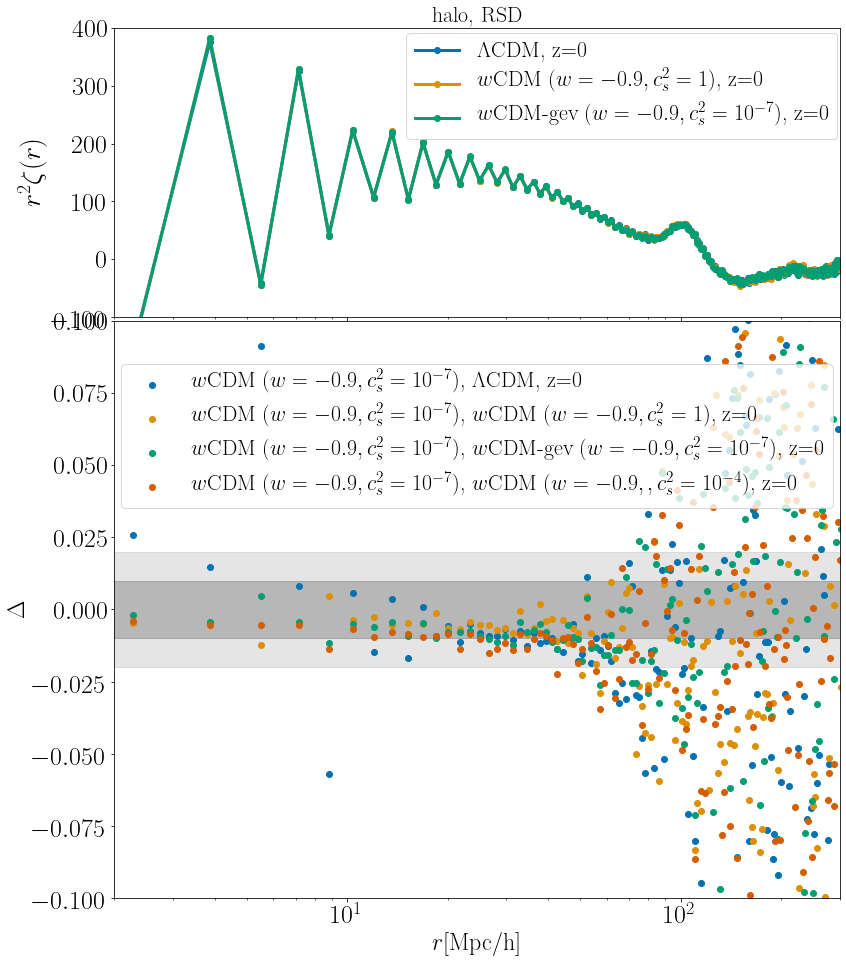

In [331]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'halo'
RSD ='RSD'
file_type = 'cor'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [r,zeta]=data[kind][RSD][file[i]][file_type][z[j]][[0,1],:]  
        axs[0].plot(r,zeta*r**2,"-o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$r^2 \zeta(r)$',fontsize=28)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_xscale('log')
axs[0].set_ylim(-100,400)
# axs[0].set_xlim(1.e-2,500)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.7, 0.8], loc='center')
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [r1,zeta1]=data[kind][RSD][file[num1]][file_type][z[j]][[0,1],:]
                [r2,zsta2]=data[kind][RSD][file[num2]][file_type][z[j]][[0,1],:]
                axs[1].plot(r1,(zsta2-zeta1)/zeta1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$r$[Mpc/h]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.1,0.1)
axs[1].set_xlim(2,300)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.8], loc='center')
X=np.arange(0.001,2000,20)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# correlation function RSD, noRSD comparison

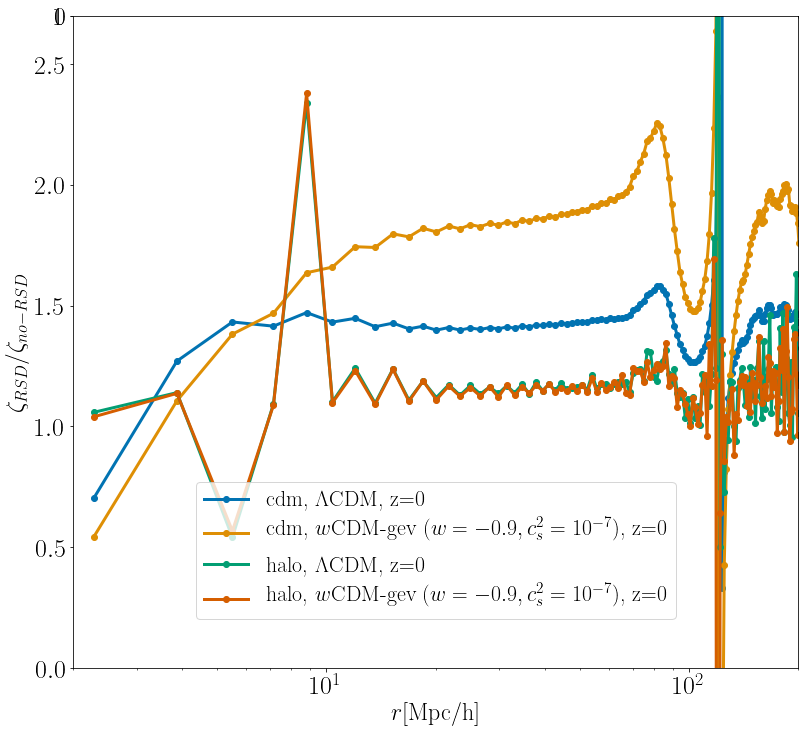

In [330]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,12),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[0,1]})
plt.subplots_adjust(hspace=0.0)



kind = 'halo'
file_type = 'cor'
RSD ='RSD'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0

kind = "cdm"
l=0
for num1 in [0,2]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]][file_type][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]][file_type][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"-o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;
kind = 'halo'
for num1 in [0,2]: # file 1
    for j in [0]: # Redshifts
            [k1,pk1]=data[kind]['noRSD'][file[num1]][file_type][z[j]][[0,1],:]
            [k2,pk2]=data[kind]['RSD'][file[num1]][file_type][z[j]][[0,1],:]
            axs[1].plot(k1,pk2/pk1,"-o",color =Colors[l], lw=3,label=kind+", "+decrip[num1]+" "+z[j])
            l=l+1;

axs[1].set_ylabel('$\zeta_{RSD}/\zeta_{no-RSD}$',fontsize=24)
axs[1].set_xlabel('$r$[Mpc/h]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0,2.7)
axs[1].set_xlim(2,200)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.18], loc='center')
# X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# quadrupole moment RSD, noRSD, halo

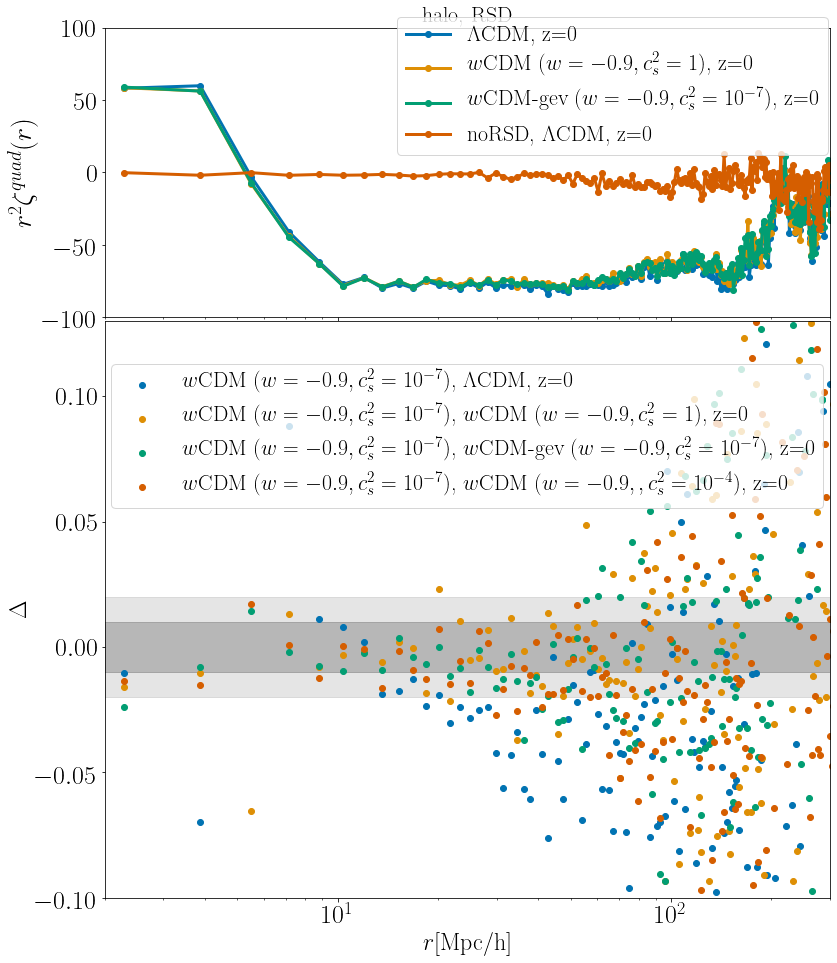

In [340]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'halo'
RSD ='RSD'
file_type = 'cor'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [r,zeta]=data[kind][RSD][file[i]][file_type][z[j]][[0,2],:]  
        axs[0].plot(r,zeta*r**2,"-o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1
        
for i in [0]: # file
    for j in [0]: # Redshifts
        [r,zeta]=data[kind]['noRSD'][file[i]][file_type][z[j]][[0,2],:]  
        axs[0].plot(r,zeta*r**2,"-o",color =Colors[l], lw=3,label="noRSD, "+decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$r^2 \zeta^{quad}(r)$',fontsize=28)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_xscale('log')
axs[0].set_ylim(-100,100)
# axs[0].set_xlim(1.e-2,500)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.7, 0.8], loc='center')
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [r1,zeta1]=data[kind][RSD][file[num1]][file_type][z[j]][[0,2],:]
                [r2,zsta2]=data[kind][RSD][file[num2]][file_type][z[j]][[0,2],:]
                axs[1].plot(r1,(zsta2-zeta1)/zeta1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$r$[Mpc/h]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(-0.1,0.13)
axs[1].set_xlim(2,300)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.8], loc='center')
X=np.arange(0.001,2000,20)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)


# quadrupole moment RSD, noRSD, cdm

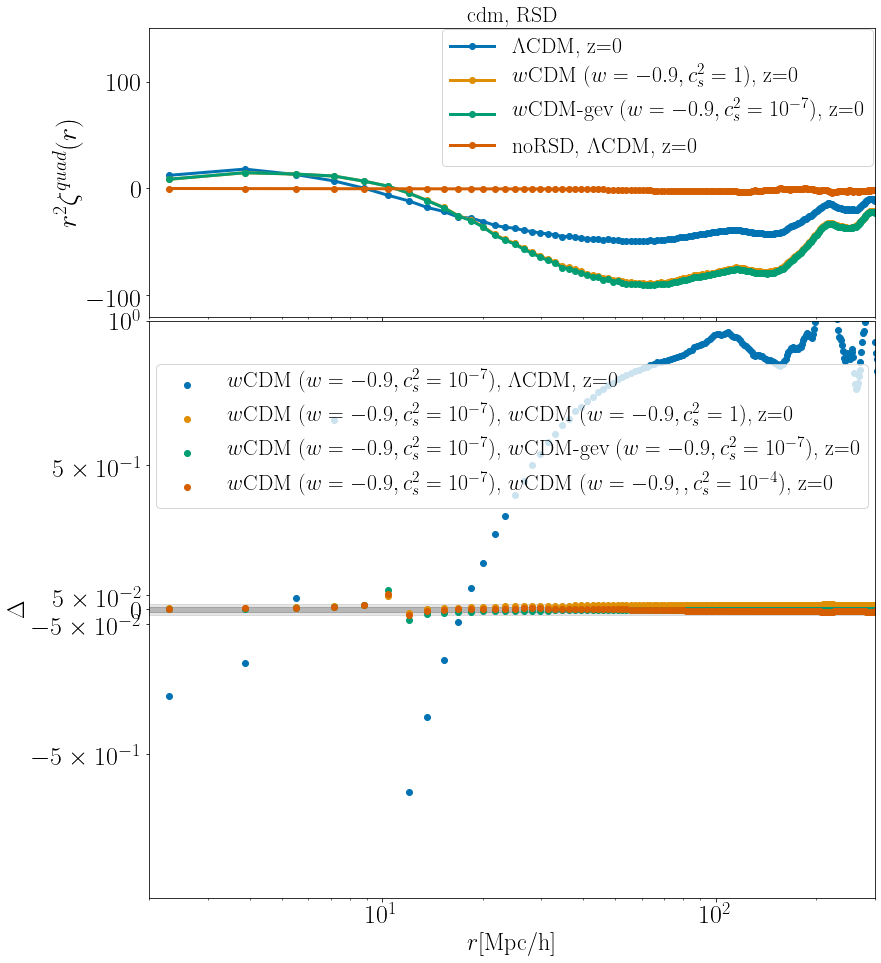

In [347]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cdm'
RSD ='RSD'
file_type = 'cor'
file = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ",
          "$w$CDM ($w=-0.9,, c_s^2=10^{-4}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];

l=0
for i in [0,1,2]: # file
    for j in [0]: # Redshifts
        [r,zeta]=data[kind][RSD][file[i]][file_type][z[j]][[0,2],:]  
        axs[0].plot(r,zeta*r**2,"-o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1
        
for i in [0]: # file
    for j in [0]: # Redshifts
        [r,zeta]=data[kind]['noRSD'][file[i]][file_type][z[j]][[0,2],:]  
        axs[0].plot(r,zeta*r**2,"-o",color =Colors[l], lw=3,label="noRSD, "+decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel('$r^2 \zeta^{quad}(r)$',fontsize=28)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_xscale('log')
axs[0].set_ylim(-120,150)
# axs[0].set_xlim(1.e-2,500)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.7, 0.76], loc='center')
axs[0].set_title(kind+", "+RSD, fontsize=22)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [4]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [r1,zeta1]=data[kind][RSD][file[num1]][file_type][z[j]][[0,2],:]
                [r2,zsta2]=data[kind][RSD][file[num2]][file_type][z[j]][[0,2],:]
                axs[1].plot(r1,(zsta2-zeta1)/zeta1,"o",color =Colors[l], lw=3,label=decrip[num2]+decrip[num1]+" "+z[j])
                l=l+1;

axs[1].set_ylabel('$\Delta$',fontsize=24)
axs[1].set_xlabel('$r$[Mpc/h]',fontsize=24)
axs[1].set_xscale('log')
plt.yscale('symlog')
axs[1].set_ylim(-1,1)
axs[1].set_xlim(2,300)
axs[1].set_yticks([-0.5,-0.05,0,0.05,0.5,1])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.5, 0.8], loc='center')
X=np.arange(0.001,2000,20)
axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)
